In [37]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Import DataFrame 
main_df = pd.read_csv('Rates_MO.csv')
main_df.columns

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

In [39]:
# Create credit card dataset
ccard_df = main_df[['observation_date', 'CCARD_CO', 'CCARD_DELNQ', 'GDP', 'Household_DBT_Inc', 'Consumer_Confidence', 'FEDFUNDS', 'SAVINGS_RATE_MO', 'UNRATE']]

ccard_df["year"] = pd.to_datetime(ccard_df["observation_date"]).dt.year
ccard_df["month"] = pd.to_datetime(ccard_df["observation_date"]).dt.month
# Create copy for bins
ccard_bin_df = ccard_df.copy()

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15606/4234555149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccard_df["year"] = pd.to_datetime(ccard_df["observation_date"]).dt.year
/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15606/4234555149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccard_df["month"] = pd.to_datetime(ccard_df["observation_date"]).dt.month


In [40]:
# Binning the data for classification Question: 
# Should we be using pd cut to get more bins? 
ccard_bin_df["CCARD_CO_BIN"] = pd.qcut(ccard_df['CCARD_CO'],4, labels= [1, 2, 3, 4])

In [41]:
# Seperate the y and X variables
y = ccard_bin_df["CCARD_CO_BIN"]
#X = ccard_df

y

0      3
1      3
2      3
3      3
4      3
      ..
385    1
386    1
387    1
388    1
389    1
Name: CCARD_CO_BIN, Length: 390, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [42]:
ccard_df = ccard_df.drop(columns=["CCARD_CO","observation_date"])
ccard_df

CCARD_DELNQ  GDP  Household_DBT_Inc  Consumer_Confidence  FEDFUNDS  \
0           5.26 -1.9          11.578032                 66.8      6.91   
1           5.26 -1.9          11.578032                 70.4      6.25   
2           5.26 -1.9          11.578032                 87.7      6.12   
3           5.48  3.2          11.434237                 81.8      5.91   
4           5.48  3.2          11.434237                 78.3      5.78   
..           ...  ...                ...                  ...       ...   
385         2.43  2.2           9.848832                 67.0      4.57   
386         2.43  2.2           9.848832                 62.0      4.65   
387         2.77  2.1           9.826692                 63.5      4.83   
388         2.77  2.1           9.826692                 59.2      5.06   
389         2.77  2.1           9.826692                 64.4      5.08   

     SAVINGS_RATE_MO  UNRATE  year  month  
0                9.4     6.4  1991      1  
1                9.0     6.6  1991      2  
2                8.1     6.8  1991      3  
3                8.7     6.7  1991      4  
4                8.5     6.9  1991      5  
..               ...     ...   ...    ...  
385              4.7     3.6  2023      2  
386              5.2     3.5  2023      3  
387              5.2     3.4  2023      4  
388              5.3     3.7  2023      5  
389              4.9     3.6  2023      6  

[390 rows x 9 columns]

In [43]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(ccard_df, y, random_state=78)

In [44]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=5, random_state=1, min_samples_leaf=1)

In [46]:
# Fitting the model
model = model.fit(X_train, y_train)

In [47]:
# Making predictions using the testing data
predictions = model.predict(X_test)

In [48]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [49]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     25                     0   
Actual Medium-Low               1                    22   
Actual Medium-High              0                     1   
High                            0                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               0  
Actual Medium-Low                       1               0  
Actual Medium-High                     22               1  
High                                    2              23

Accuracy Score : 0.9387755102040817
Classification Report
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       0.96      0.92      0.94        24
           3       0.88      0.92      0.90        24
           4       0.96      0.92      0.94        25

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.94        98
weighted avg       0.94      0.94      0.94        98



In [50]:
# Print Importance of the Features
features = zip(model.feature_names_in_,model.feature_importances_)
for f in features:
    print(f)


('CCARD_DELNQ', 0.2814743230986051)
('GDP', 0.0285388728592874)
('Household_DBT_Inc', 0.33529921787083267)
('Consumer_Confidence', 0.08415999573211415)
('FEDFUNDS', 0.1878520606825836)
('SAVINGS_RATE_MO', 0.0)
('UNRATE', 0.08267552975657708)
('year', 0.0)
('month', 0.0)


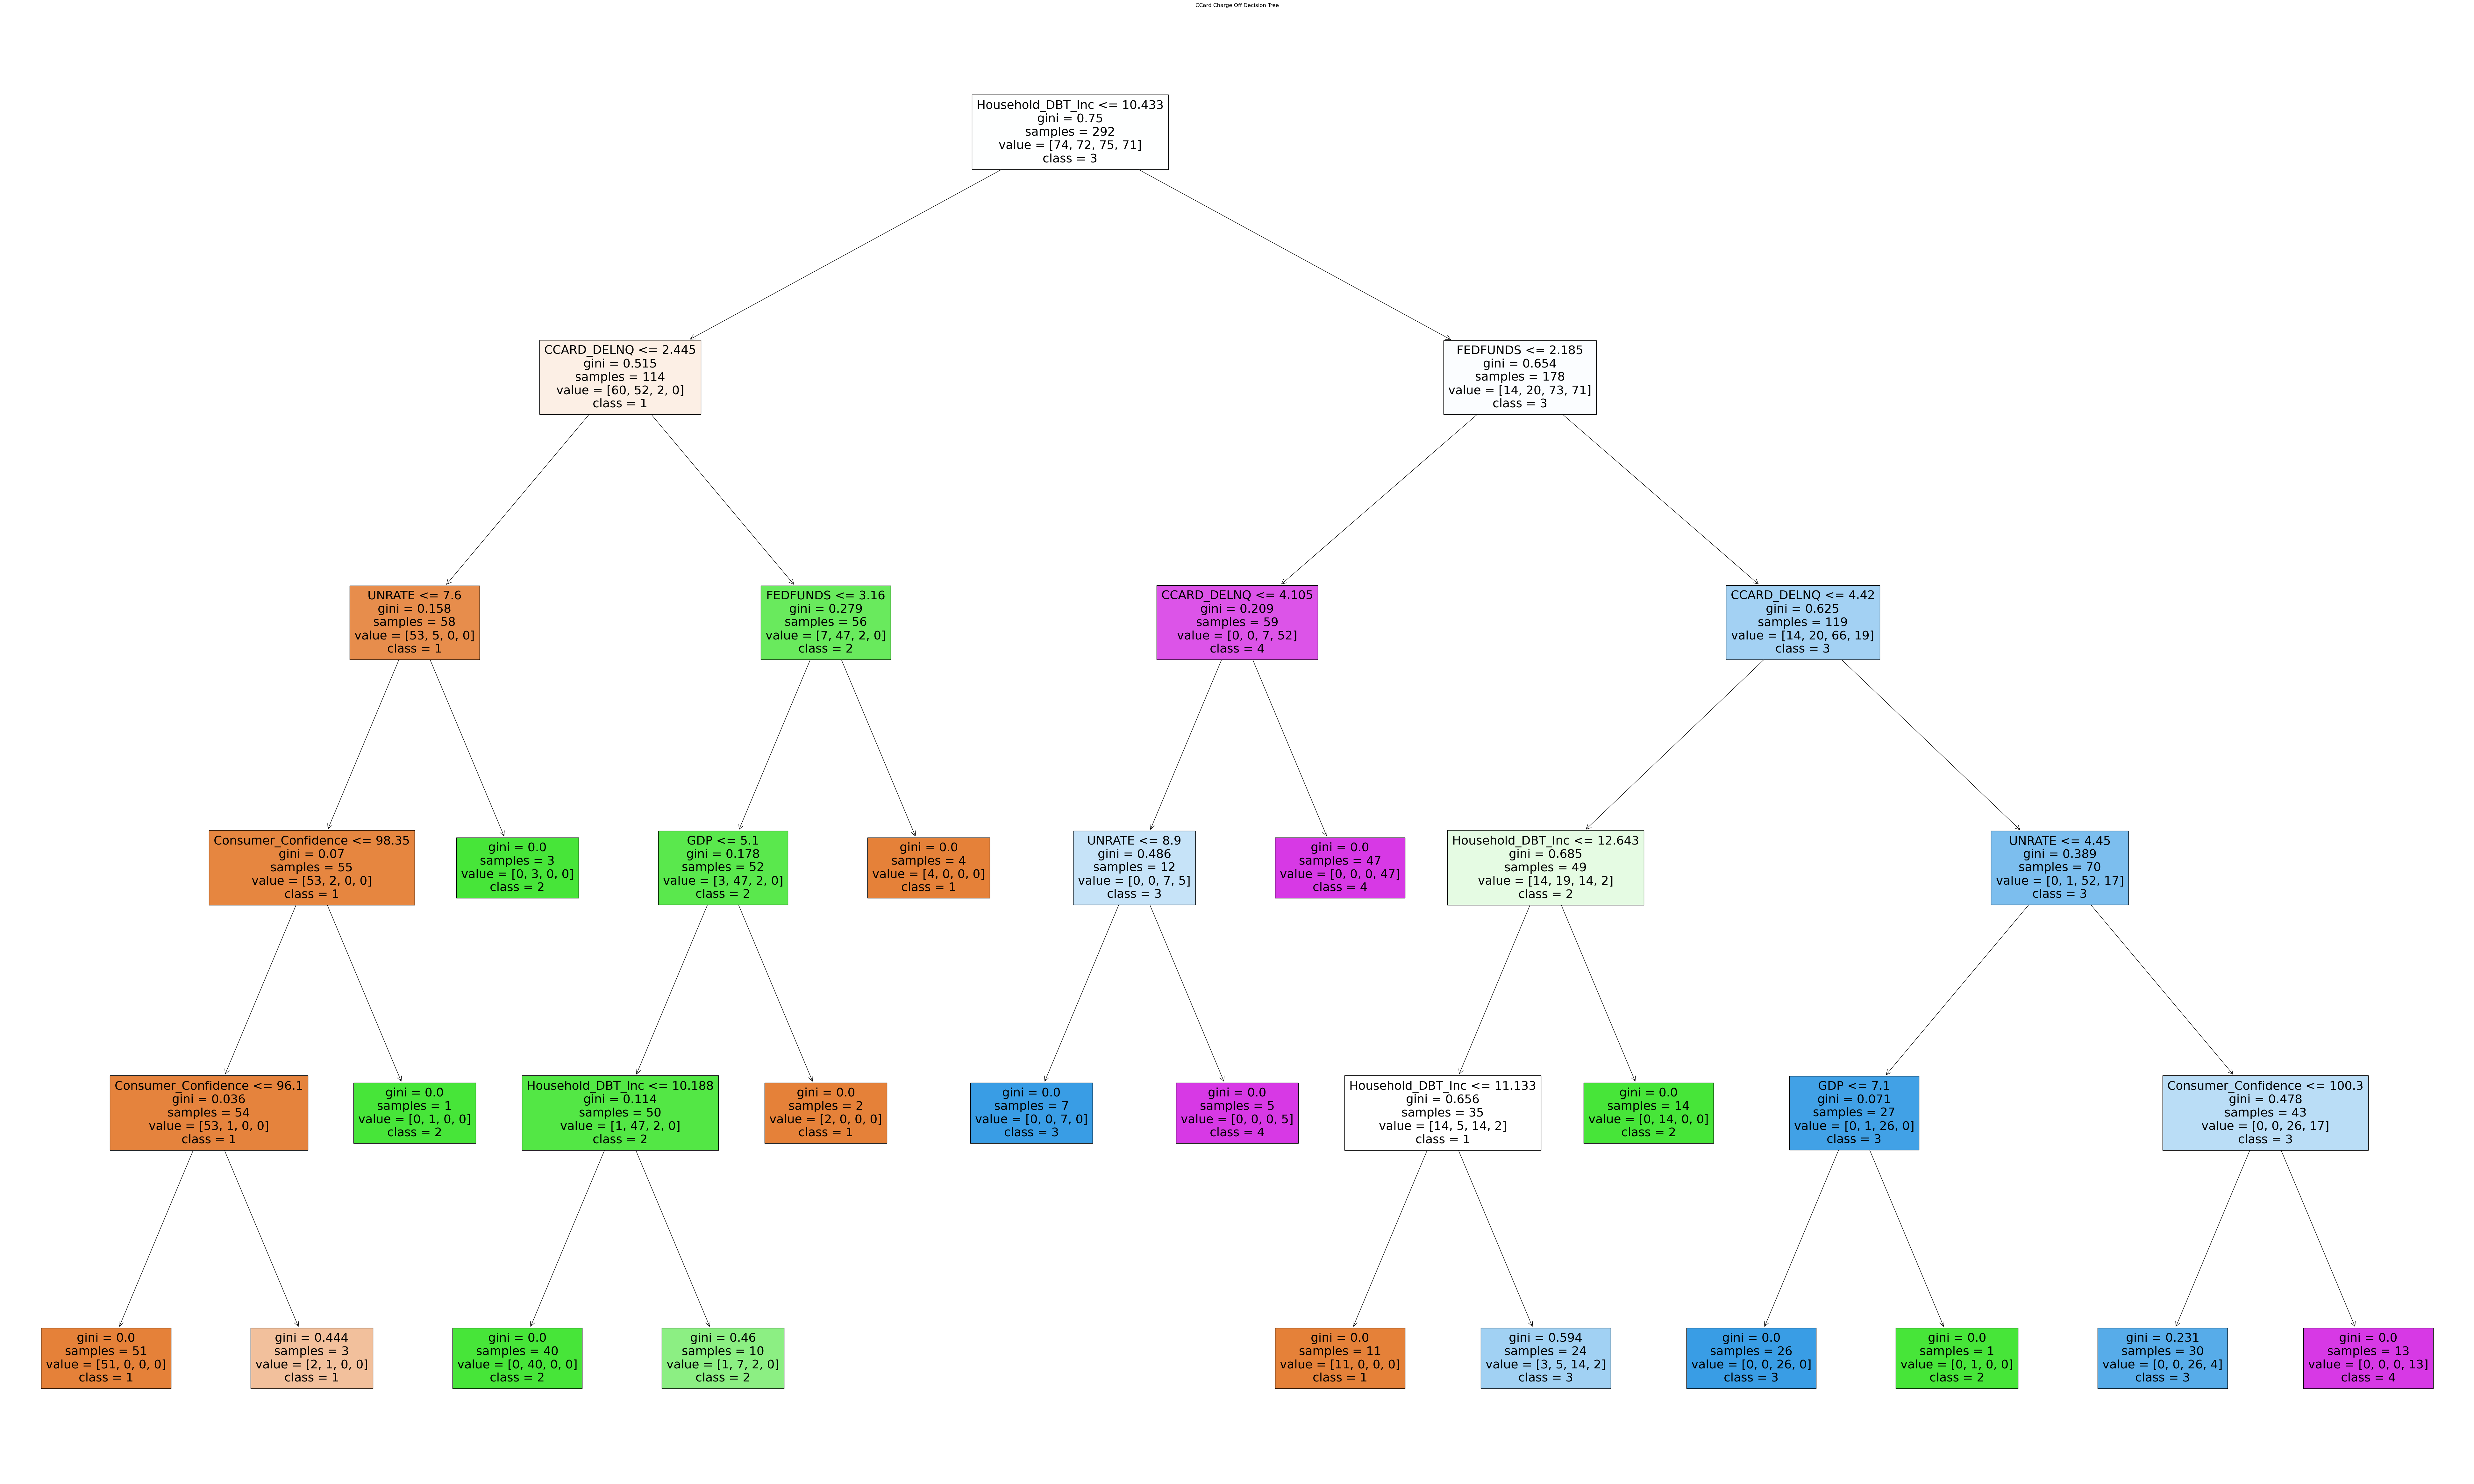

In [51]:
# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model, filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("CCard Charge Off Decision Tree")
plt.show()

## CCard_df Random Forest


In [52]:
model = RandomForestClassifier(n_estimators=1000, max_depth=9, max_samples=100, random_state=1)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     25                     0   
Actual Medium-Low               0                    22   
Actual Medium-High              0                     0   
High                            0                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               0  
Actual Medium-Low                       2               0  
Actual Medium-High                     21               3  
High                                    0              25

Accuracy Score : 0.9489795918367347
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      0.92      0.96        24
           3       0.91      0.88      0.89        24
           4       0.89      1.00      0.94        25

    accuracy                           0.95        98
   macro avg       0.95      0.95      0.95        98
weighted avg       0.95      0.95      0.95        98



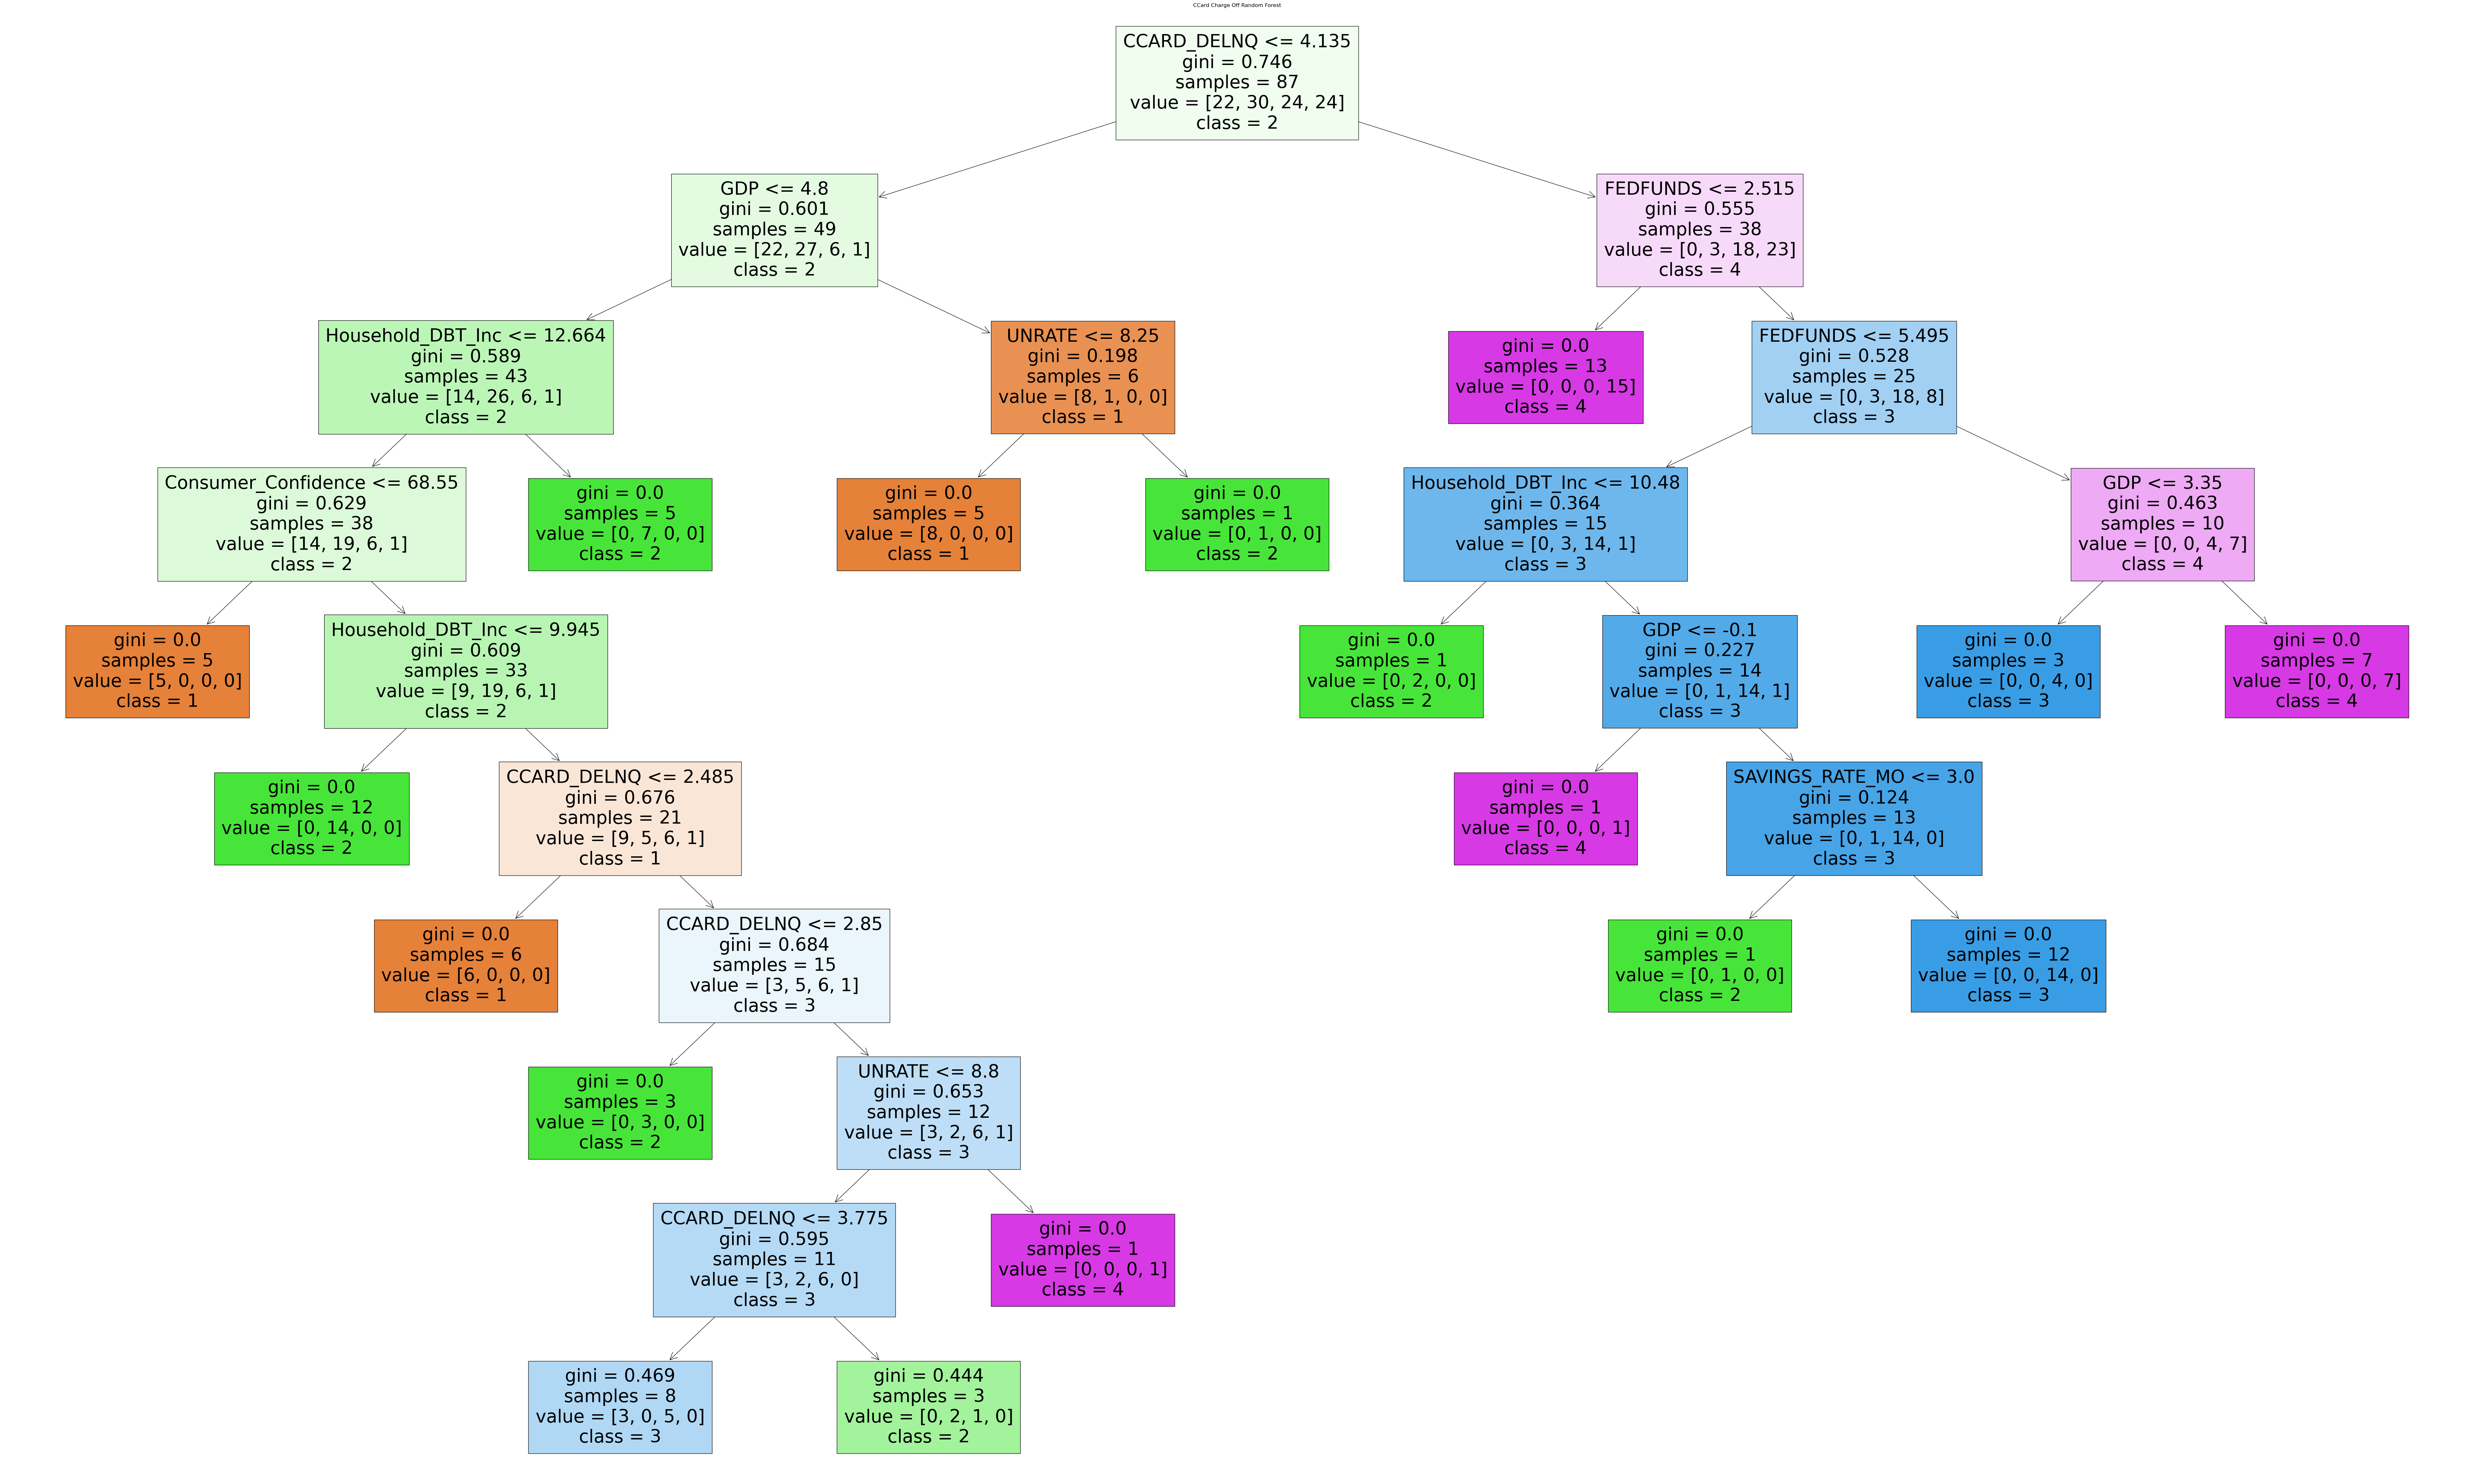

In [53]:
# Visualize the Random Forest
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model.estimators_[4], filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("CCard Charge Off Random Forest")
plt.show()

# Lag the ccard_df data 6 months and create Decision Tree

In [54]:
# Shift Xs 6 months (18 lines) to access effect of lag
ccard_df_deltas = ccard_df - ccard_df.shift(18)

In [55]:
ccard_df.head()

CCARD_DELNQ  GDP  Household_DBT_Inc  Consumer_Confidence  FEDFUNDS  \
0         5.26 -1.9          11.578032                 66.8      6.91   
1         5.26 -1.9          11.578032                 70.4      6.25   
2         5.26 -1.9          11.578032                 87.7      6.12   
3         5.48  3.2          11.434237                 81.8      5.91   
4         5.48  3.2          11.434237                 78.3      5.78   

   SAVINGS_RATE_MO  UNRATE  year  month  
0              9.4     6.4  1991      1  
1              9.0     6.6  1991      2  
2              8.1     6.8  1991      3  
3              8.7     6.7  1991      4  
4              8.5     6.9  1991      5

In [56]:
ccard_df_deltas.head(20)

CCARD_DELNQ  GDP  Household_DBT_Inc  Consumer_Confidence  FEDFUNDS  \
0           NaN  NaN                NaN                  NaN       NaN   
1           NaN  NaN                NaN                  NaN       NaN   
2           NaN  NaN                NaN                  NaN       NaN   
3           NaN  NaN                NaN                  NaN       NaN   
4           NaN  NaN                NaN                  NaN       NaN   
5           NaN  NaN                NaN                  NaN       NaN   
6           NaN  NaN                NaN                  NaN       NaN   
7           NaN  NaN                NaN                  NaN       NaN   
8           NaN  NaN                NaN                  NaN       NaN   
9           NaN  NaN                NaN                  NaN       NaN   
10          NaN  NaN                NaN                  NaN       NaN   
11          NaN  NaN                NaN                  NaN       NaN   
12          NaN  NaN                NaN                  NaN       NaN   
13          NaN  NaN                NaN                  NaN       NaN   
14          NaN  NaN                NaN                  NaN       NaN   
15          NaN  NaN                NaN                  NaN       NaN   
16          NaN  NaN                NaN                  NaN       NaN   
17          NaN  NaN                NaN                  NaN       NaN   
18        -0.28  5.9          -1.037982                  9.8     -3.66   
19        -0.28  5.9          -1.037982                  5.7     -2.95   

    SAVINGS_RATE_MO  UNRATE  year  month  
0               NaN     NaN   NaN    NaN  
1               NaN     NaN   NaN    NaN  
2               NaN     NaN   NaN    NaN  
3               NaN     NaN   NaN    NaN  
4               NaN     NaN   NaN    NaN  
5               NaN     NaN   NaN    NaN  
6               NaN     NaN   NaN    NaN  
7               NaN     NaN   NaN    NaN  
8               NaN     NaN   NaN    NaN  
9               NaN     NaN   NaN    NaN  
10              NaN     NaN   NaN    NaN  
11              NaN     NaN   NaN    NaN  
12              NaN     NaN   NaN    NaN  
13              NaN     NaN   NaN    NaN  
14              NaN     NaN   NaN    NaN  
15              NaN     NaN   NaN    NaN  
16              NaN     NaN   NaN    NaN  
17              NaN     NaN   NaN    NaN  
18              0.1     1.3   1.0    6.0  
19              0.6     1.0   1.0    6.0

In [21]:
ccard_df_deltas = ccard_df_deltas.iloc[6:]
ccard_df_deltas

CCARD_DELNQ  GDP  Household_DBT_Inc  Consumer_Confidence  FEDFUNDS  \
6            NaN  NaN                NaN                  NaN       NaN   
7            NaN  NaN                NaN                  NaN       NaN   
8            NaN  NaN                NaN                  NaN       NaN   
9            NaN  NaN                NaN                  NaN       NaN   
10           NaN  NaN                NaN                  NaN       NaN   
..           ...  ...                ...                  ...       ...   
385         0.88 -1.1           0.468393                 -3.3      4.48   
386         0.88 -1.1           0.468393                -10.8      4.57   
387         1.20 -4.9           0.320113                 -8.2      4.75   
388         1.20 -4.9           0.320113                 -8.2      4.98   
389         1.20 -4.9           0.320113                 -6.2      5.00   

     SAVINGS_RATE_MO  UNRATE  year  month  
6                NaN     NaN   NaN    NaN  
7                NaN     NaN   NaN    NaN  
8                NaN     NaN   NaN    NaN  
9                NaN     NaN   NaN    NaN  
10               NaN     NaN   NaN    NaN  
..               ...     ...   ...    ...  
385             -4.0    -1.6   2.0   -6.0  
386             -2.0    -1.3   2.0   -6.0  
387             -1.4    -1.1   2.0   -6.0  
388             -0.9    -0.5   2.0   -6.0  
389             -1.2    -0.3   2.0   -6.0  

[384 rows x 9 columns]

In [22]:
y_deltas = y.loc[6:]
y_deltas

6      3
7      3
8      3
9      3
10     3
      ..
385    1
386    1
387    1
388    1
389    1
Name: CCARD_CO_BIN, Length: 384, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [23]:
#train test split again,  train again,  find insights of shifted data
X_train, X_test, y_train, y_test = train_test_split(ccard_df_deltas, y_deltas, random_state=78)

In [24]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=5, random_state=1, min_samples_leaf=1)

In [26]:
# Fit the model and make predictions
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
# Calculating the confusion matrix for lagged data
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Low", "Actual Medium-Low", "Actual Medium-High", "High"], columns=["Predicted Low", "Predicted Medium-Low", "Predicted Medium-High", "Predicted High"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted Low  Predicted Medium-Low  \
Actual Low                     18                     0   
Actual Medium-Low               3                    15   
Actual Medium-High              1                     7   
High                            4                     0   

                    Predicted Medium-High  Predicted High  
Actual Low                              0               1  
Actual Medium-Low                       2               4  
Actual Medium-High                     12               7  
High                                    0              22

Accuracy Score : 0.6979166666666666
Classification Report
              precision    recall  f1-score   support

           1       0.69      0.95      0.80        19
           2       0.68      0.62      0.65        24
           3       0.86      0.44      0.59        27
           4       0.65      0.85      0.73        26

    accuracy                           0.70        96
   macro avg       0.72      0.72      0.69        96
weighted avg       0.72      0.70      0.68        96



In [ ]:
# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model, filled=True, feature_names=list(X_test.columns), class_names=[str(i) for i in model.classes_])
plt.title("CCard Lagged Charge Off Decision Tree")
plt.show()

In [ ]:
# Identify Year as an independent variable
ccard_df = main_df[['observation_date', 'CCARD_CO', 'CCARD_DELNQ', 'GDP', 'Household_DBT_Inc', 'Consumer_Confidence', 'FEDFUNDS', 'SAVINGS_RATE_MO', 'UNRATE']]

ccard_df["year"] = pd.to_datetime(ccard_df["observation_date"]).dt.year
#ccard_df["month"] = pd.to_datetime(ccard_df["observation_date"]).dt.month
# Create copy for bins
#ccard_bin_df = ccard_df.copy()

In [ ]:
# Identify year and month as independent variables 

ccard_df = main_df[['observation_date', 'CCARD_CO', 'CCARD_DELNQ', 'GDP', 'Household_DBT_Inc', 'Consumer_Confidence', 'FEDFUNDS', 'SAVINGS_RATE_MO', 'UNRATE']]

ccard_df["year"] = pd.to_datetime(ccard_df["observation_date"]).dt.year
ccard_df["month"] = pd.to_datetime(ccard_df["observation_date"]).dt.month
# Create copy for bins
ccard_bin_df = ccard_df.copy()

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15606/1198039640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccard_df["year"] = pd.to_datetime(ccard_df["observation_date"]).dt.year
/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_15606/1198039640.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccard_df["month"] = pd.to_datetime(ccard_df["observation_date"]).dt.month


In [ ]:
y = ccard_bin_df["CCARD_CO"]

ccard_df = ccard_df.drop(columns=["CCARD_CO","observation_date","year","month"])

y

0      4.16
1      4.16
2      4.16
3      4.60
4      4.60
       ... 
385    2.89
386    2.89
387    3.15
388    3.15
389    3.15
Name: CCARD_CO, Length: 390, dtype: float64

In [32]:
# Train data
X_train, X_test, y_train, y_test = train_test_split(ccard_df, y, random_state=78)

In [33]:
# Use Decision TreeRegressor to model data

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)

model = model.fit(X_train, y_train)

predictions = model.predict(X_test)

predictions

array([ 3.53582278,  5.91375   ,  7.58      , 10.38      , 10.38      ,
        4.0975    ,  5.605     ,  4.07      ,  1.7275    ,  5.91375   ,
        3.53582278,  4.326     ,  3.53582278,  3.53582278, 10.38      ,
        3.53582278,  5.20482759,  8.985     ,  1.7275    ,  3.53582278,
        4.39428571, 10.38      ,  4.326     ,  3.53582278,  1.7275    ,
        3.53582278,  4.56529412,  2.99758621,  3.53582278,  5.20482759,
        4.07      ,  5.605     ,  4.07      ,  3.53582278,  3.53582278,
        5.91375   ,  3.53582278,  2.36      ,  5.20482759,  3.53582278,
        4.07      ,  4.39428571,  3.53582278,  2.99758621,  3.53582278,
        3.53582278,  3.53582278,  3.53582278,  4.39428571,  2.99758621,
       10.41      ,  3.53582278,  2.99758621, 10.51      ,  5.20482759,
        5.20482759,  5.91375   ,  3.53582278,  4.56529412,  2.13      ,
        5.20482759,  5.20482759,  3.53582278,  4.56529412,  3.53582278,
        6.94      ,  3.53582278,  5.20482759,  2.99758621,  5.20

In [34]:
# Calculate the mean absolute percentage error of the Regression model
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,predictions)

0.06592409894279011

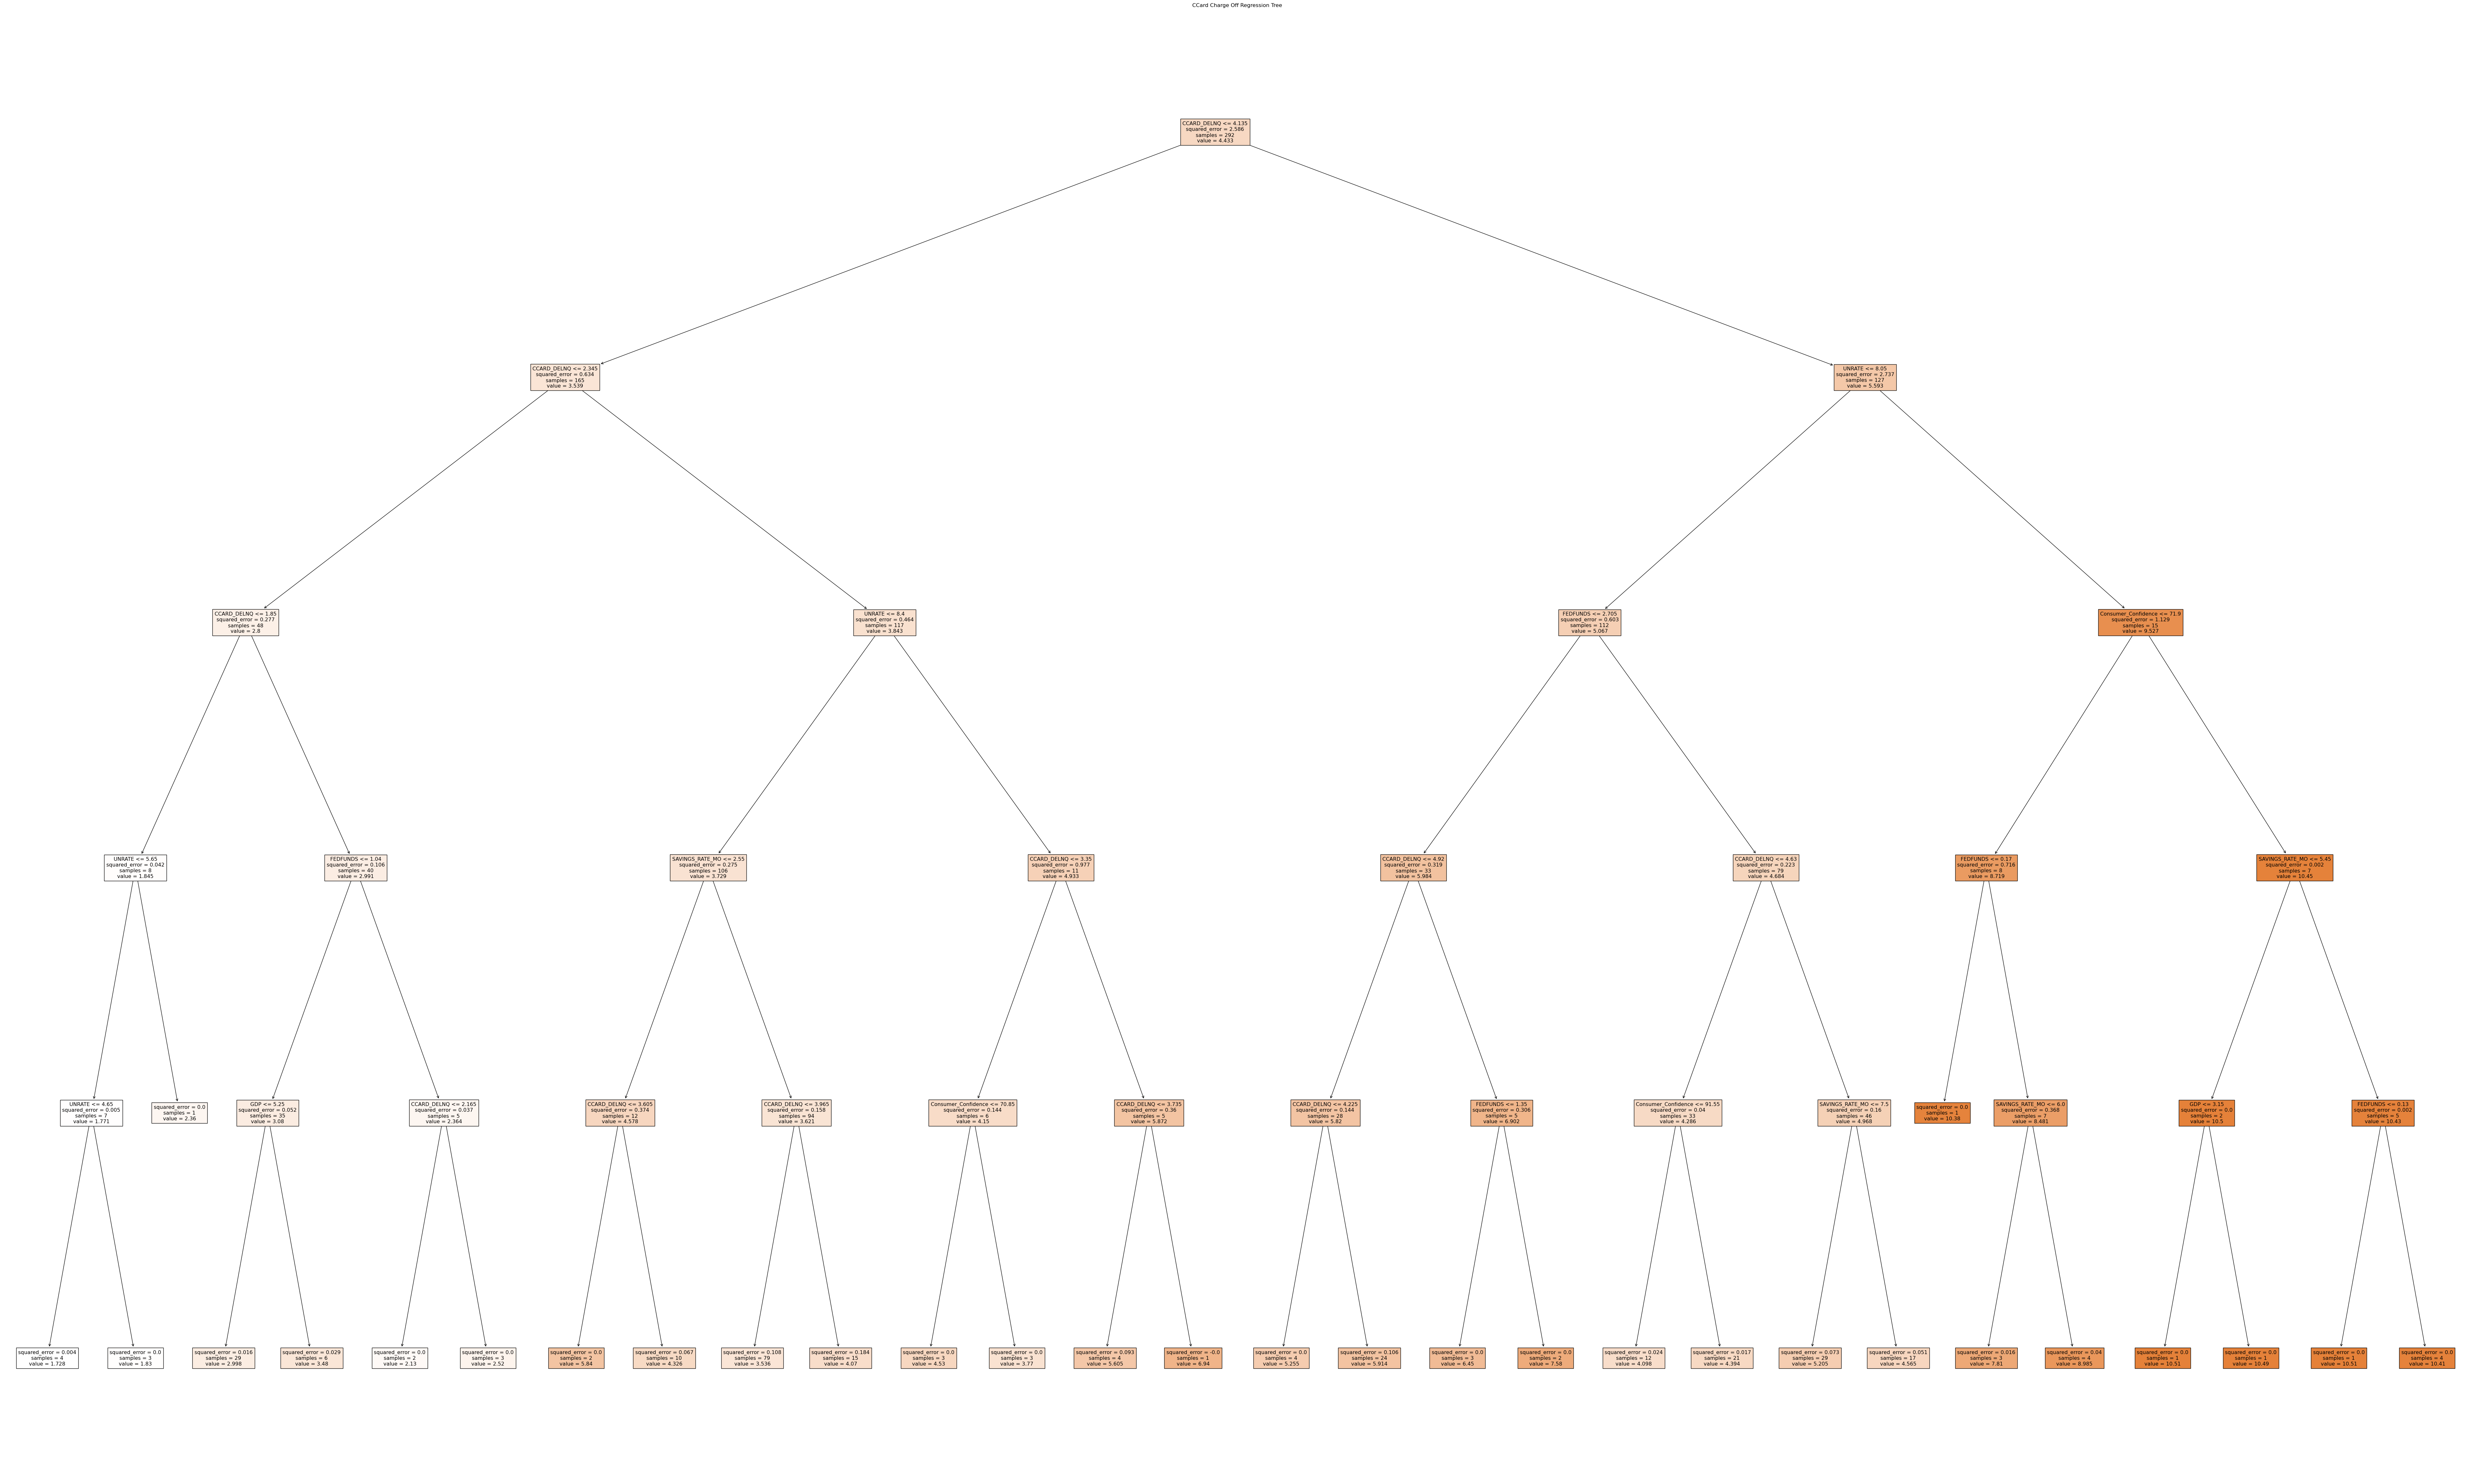

In [35]:
fig, ax = plt.subplots(figsize=(100,60))
plot_tree(model, filled=True, feature_names=list(X_test.columns))
plt.title("CCard Charge Off Regression Tree")
plt.show()